In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import imutils
from google.colab.patches import cv2_imshow

Single line Detection : 

  Character Extraction -> CNN -> Evaluate Expression

In [25]:
def singleline(path):
    #Character Extraction
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    train_data=[]
    rects=[]
    #make list of boundingrect coord
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    #check if boxes are overlapping
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    
    final_rect=[i for i in rects if i not in dump_rect]
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        print("Extracted Character\n")
        cv2_imshow(im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("\n")
        im_resize = np.reshape(im_resize,(784))
        
        train_data.append(im_resize)
    return train_data
  

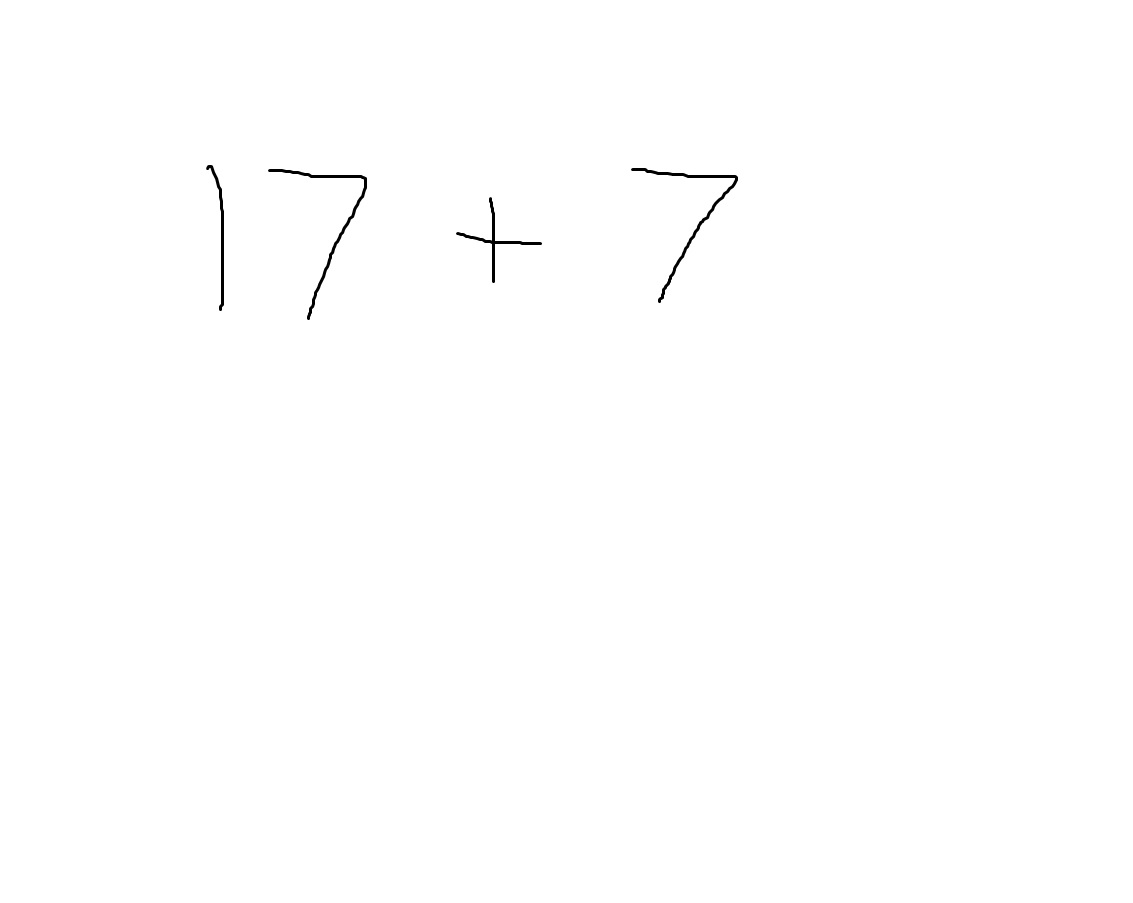

Extracted Character





Extracted Character





Extracted Character





Extracted Character



In [26]:
train_data = singleline('/content/drive/MyDrive/test2.jpg')
train_data = np.array(train_data)

In [27]:
train_data.shape

(4, 784)

In [28]:
train_data= np.dstack([train_data] * 3)
train_data = train_data.reshape(-1, 28,28,3)

In [29]:
x=train_data[0].reshape(1,28,28,3)
x.shape

(1, 28, 28, 3)

In [30]:
from keras.models import model_from_json
json_file = open('/content/drive/MyDrive/Equation Solver/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Equation Solver/model_final.h5")

In [31]:
s=''
for i in range(len(train_data)):
    x=train_data[i].reshape(1,28,28,3)
    result=np.argmax(loaded_model.predict(x))
    if(result==10):
        s=s+'-'
    if(result==11):
        s=s+'+'
    if(result==12):
        s=s+'*'
    if(result==0):
        s=s+'0'
    if(result==1):
        s=s+'1'
    if(result==2):
        s=s+'2'
    if(result==3):
        s=s+'3'
    if(result==4):
        s=s+'4'
    if(result==5):
        s=s+'5'
    if(result==6):
        s=s+'6'
    if(result==7):
        s=s+'7'
    if(result==8):
        s=s+'8'
    if(result==9):
        s=s+'9'
    
print(s)

17+7


In [32]:
eval(s)

24